In [22]:
# Read data
import pandas as pd
import json 
from glob import glob
from tqdm.auto import tqdm

rdirs = ['/mnt/scratch/shahban1/MOO/Lexicase']

frames = []
for rdir in rdirs:            
    for f in tqdm(glob('/'.join([rdir,'*.json']))):
        with open(f, 'r') as of:
            data = json.load(of)
            frames.append(data)

df = pd.DataFrame(frames)
df

100%|██████████| 143/143 [00:00<00:00, 2191.95it/s]


,alg,S,dim,n_gen,diagnostic_id,L,hv,damp,epsilon,epsilon_type,seed,rdir
0,Lexicase,200,25,100,5,10,8.066970e+24,1.0,0.0,0,31658,/mnt/scratch/shahban1/MOO/Lexicase/
1,Lexicase,300,5,100,5,10,1.583149e+05,1.0,0.0,0,16695,/mnt/scratch/shahban1/MOO/Lexicase/
2,Lexicase,100,15,100,5,10,9.283576e+14,1.0,0.0,0,6933,/mnt/scratch/shahban1/MOO/Lexicase/
3,Lexicase,200,15,100,5,10,1.165555e+15,1.0,0.0,0,31658,/mnt/scratch/shahban1/MOO/Lexicase/
4,Lexicase,200,15,100,5,10,1.242214e+15,1.0,0.0,0,27690,/mnt/scratch/shahban1/MOO/Lexicase/
...,...,...,...,...,...,...,...,...,...,...,...,...
138,Lexicase,100,5,100,5,10,1.388288e+05,1.0,0.0,0,1318,/mnt/scratch/shahban1/MOO/Lexicase/
139,Lexicase,200,25,100,5,10,9.113507e+24,1.0,0.0,0,6832,/mnt/scratch/shahban1/MOO/Lexicase/
140,Lexicase,100,75,100,5,10,0.000000e+00,1.0,0.0,0,31658,/mnt/scratch/shahban1/MOO/Lexicase/
141,Lexicase,400,5,100,5,10,1.667656e+05,1.0,0.0,0,24481,/mnt/scratch/shahban1/MOO/Lexicase/


In [23]:
df.groupby(['S','dim'])['seed'].nunique().unstack()

dim,5,15,25,50,75
S,,,,,
100,10.0,10.0,10.0,1.0,8.0
200,10.0,10.0,10.0,NaN,2.0
300,10.0,10.0,6.0,NaN,2.0
400,10.0,10.0,3.0,NaN,NaN
500,10.0,10.0,1.0,NaN,NaN


In [36]:
df_test = df[(df['S'] == 100) & (df['dim'] == 75)]
df_test

,alg,S,dim,n_gen,diagnostic_id,L,hv,damp,epsilon,epsilon_type,seed,rdir,norm_hv
10,Lexicase,100,75,100,5,10,0.0,1.0,0.0,0,24481,/mnt/scratch/shahban1/MOO/Lexicase/,0.0
37,Lexicase,100,75,100,5,10,0.0,1.0,0.0,0,16695,/mnt/scratch/shahban1/MOO/Lexicase/,0.0
67,Lexicase,100,75,100,5,10,0.0,1.0,0.0,0,8233,/mnt/scratch/shahban1/MOO/Lexicase/,0.0
68,Lexicase,100,75,100,5,10,0.0,1.0,0.0,0,27690,/mnt/scratch/shahban1/MOO/Lexicase/,0.0
106,Lexicase,100,75,100,5,10,0.0,1.0,0.0,0,14724,/mnt/scratch/shahban1/MOO/Lexicase/,0.0
127,Lexicase,100,75,100,5,10,0.0,1.0,0.0,0,24284,/mnt/scratch/shahban1/MOO/Lexicase/,0.0
134,Lexicase,100,75,100,5,10,0.0,1.0,0.0,0,6832,/mnt/scratch/shahban1/MOO/Lexicase/,0.0
140,Lexicase,100,75,100,5,10,0.0,1.0,0.0,0,31658,/mnt/scratch/shahban1/MOO/Lexicase/,0.0


/tmp/ipykernel_1423245/3335599567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['hv_norm'] = df_test['hv'] / df_test['hv'].max()


(array([1., 0., 0., 1., 3., 1., 0., 0., 1., 3.]),
 array([0.8975222 , 0.90776998, 0.91801776, 0.92826554, 0.93851332,
        0.9487611 , 0.95900888, 0.96925666, 0.97950444, 0.98975222,
        1.        ]),
 <BarContainer object of 10 artists>)

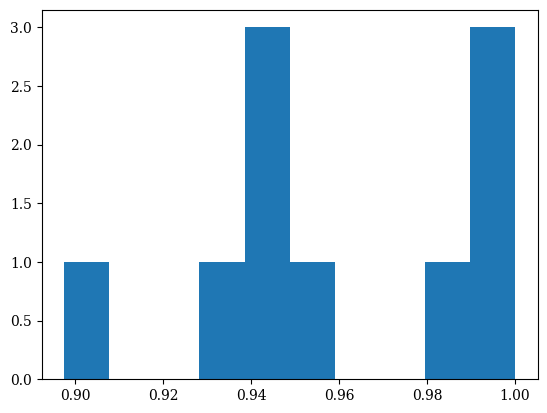

In [31]:
import matplotlib.pyplot as plt
df_test['hv_norm'] = df_test['hv'] / df_test['hv'].max()
plt.hist(df_test['hv_norm'])

In [32]:
#Pareto fronts
import os

path = '/mnt/scratch/shahban1/MOO/Lexicase/experiment'
target_S = 100
target_dim = 75

for filename in os.listdir(path):
    if filename.endswith(".json"):
        parts = filename.split('-')
        try:
            # Extract values from the filename
            S_value = int(parts[3])
            dim_value = int(parts[5])
            
            # Check if they match the target values
            if S_value == target_S and dim_value == target_dim:
                print(f"Found file: {filename}")
                with open(os.path.join(path, filename), 'r') as of:
                    data = json.load(of)
                    print(data)
        except (IndexError, ValueError):
            continue



Found file: alg-Lexicase-S-100-dim-75-seed-14724.json


{'X': [[3.304111131513099, 0.4234699564037484, 0.738933256662193, 0.2396074587840753, 0.47698811846386324, 0.17082723048737508, 1.1102516741887047, 0.23047492174489737, 0.21575348850875387, 0.311062613663573, 0.574665939706029, 0.17638782066638337, 0.051744490036484826, 0.08907963425665877, 0.5605310426022682, 0.2454189546789804, 0.05115642062217962, 0.9688036994325611, 0.3185867768817776, 0.23027553095964742, 0.3504448731276491, 0.010464762588978091, 0.14893295803373985, 0.24993253236548418, 0.7272778017240258, 0.42020350118207683, 0.22478187263591687, 0.04876169527038749, 0.8741086682855637, 0.16358373913723917, 1.1762302795424184, 0.011996456076742039, 0.6333742216415694, 0.14239590910958277, 0.0996607136522805, 0.3166738479879283, 0.518528163309708, 0.6704125243164449, 1.03726236915762, 0.21795049510766717, 0.12247401131594038, 0.11900908022073653, 0.14833312688518507, 0.30189150813274845, 0.1780003748356545, 0.275404498295023, 1.3071897585919554, 0.04166030446321234, 0.05165049280

[[29.88253931 33.58248267 32.95155607 ... 34.33654404 33.68687101
  34.39570514]
 [29.29956789 35.06085024 34.42992364 ... 35.8149116  35.16523858
  35.87407271]
 [28.79904144 34.56032379 33.92939719 ... 35.31438516 34.66471213
  35.37354626]
 ...
 [30.00904674 35.77032909 35.13940249 ... 36.52439045 35.87471743
  36.58355156]
 [28.50433077 34.26561312 33.63468652 ... 35.01967449 34.37000146
  35.07883559]
 [30.00303848 34.71868071 34.08775411 ... 35.47274208 34.82306905
  35.53190318]]


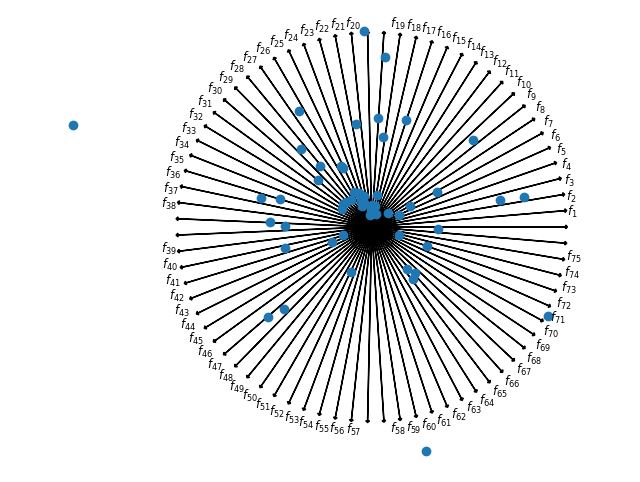

In [33]:
import numpy as np
opt_F = np.array(data['opt_F'])
print(opt_F)

from pymoo.visualization.star_coordinate import StarCoordinate
StarCoordinate().add(opt_F).show()


In [25]:
#normalize HVs
df['norm_hv'] = df.apply(lambda row: row['hv'] / (4*(10 ** row['dim'])), axis=1)
df


,alg,S,dim,n_gen,diagnostic_id,L,hv,damp,epsilon,epsilon_type,seed,rdir,norm_hv
0,Lexicase,200,25,100,5,10,8.066970e+24,1.0,0.0,0,31658,/mnt/scratch/shahban1/MOO/Lexicase/,0.201674
1,Lexicase,300,5,100,5,10,1.583149e+05,1.0,0.0,0,16695,/mnt/scratch/shahban1/MOO/Lexicase/,0.395787
2,Lexicase,100,15,100,5,10,9.283576e+14,1.0,0.0,0,6933,/mnt/scratch/shahban1/MOO/Lexicase/,0.232089
3,Lexicase,200,15,100,5,10,1.165555e+15,1.0,0.0,0,31658,/mnt/scratch/shahban1/MOO/Lexicase/,0.291389
4,Lexicase,200,15,100,5,10,1.242214e+15,1.0,0.0,0,27690,/mnt/scratch/shahban1/MOO/Lexicase/,0.310553
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Lexicase,100,5,100,5,10,1.388288e+05,1.0,0.0,0,1318,/mnt/scratch/shahban1/MOO/Lexicase/,0.347072
139,Lexicase,200,25,100,5,10,9.113507e+24,1.0,0.0,0,6832,/mnt/scratch/shahban1/MOO/Lexicase/,0.227838
140,Lexicase,100,75,100,5,10,0.000000e+00,1.0,0.0,0,31658,/mnt/scratch/shahban1/MOO/Lexicase/,0.000000
141,Lexicase,400,5,100,5,10,1.667656e+05,1.0,0.0,0,24481,/mnt/scratch/shahban1/MOO/Lexicase/,0.416914


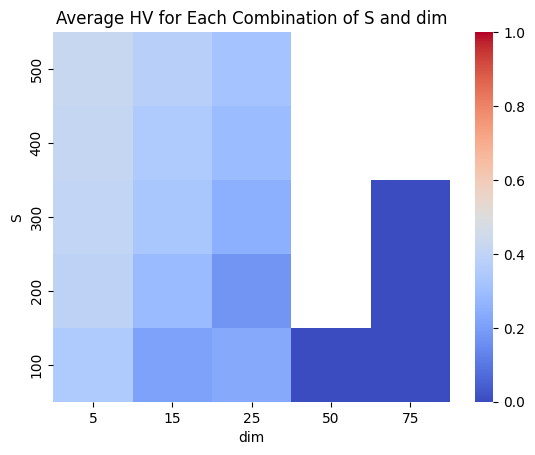

In [30]:
#HV heatmaps
import seaborn as sns
import matplotlib.pyplot as plt
heatmap_data = df.groupby(['S', 'dim'])['norm_hv'].mean().reset_index()
pivot_table = heatmap_data.pivot_table(index='S', columns='dim', values='norm_hv')
ax = sns.heatmap(pivot_table, cmap='coolwarm', annot=False, fmt=".3f", vmin=0, vmax=1)
ax.invert_yaxis()
plt.title('Average HV for Each Combination of S and dim')
plt.xlabel('dim')
plt.ylabel('S')
plt.show()


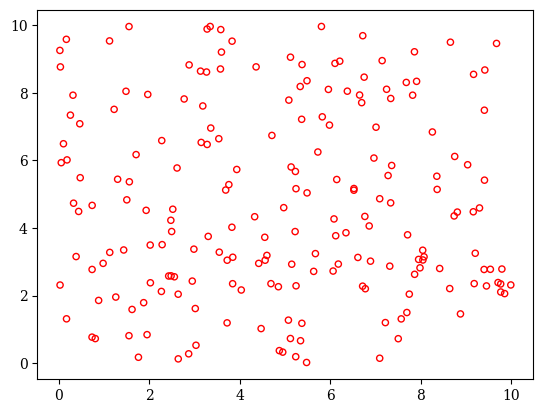

In [42]:
from pymoo.core.problem import Problem
from pymoo.operators.sampling.rnd import FloatRandomSampling, BinaryRandomSampling, PermutationRandomSampling
from pymoo.util import plotting

problem = Problem(n_var=2, xl=0, xu=10)

sampling = FloatRandomSampling()

X = sampling(problem, 200).get("X")
plotting.plot(X, no_fill=True)
